# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [1]:
!pip install simpy

In [2]:
import sympy as sp
x = sp.Symbol('x')

In [3]:
def f(x):
    return x**2-30*x+1
def g(x):
    return -x**3+5*x-7*x**2+17
def h(x):
    return x**2-1/x
def j(x):
    return 1/x**5+x**17+8

def extremum(func):
    '''
    Функция нахождения экстремумов
    '''
    symbolic_func = func(x)
    d_x = sp.diff(symbolic_func, x)
    solve_x = sp.solve(d_x, x)
    real_solutions = [x_val for x_val in solve_x if sp.im(x_val) == 0]
    extremums = [(float(x_val), (symbolic_func.subs(x, float(x_val)))) for x_val in real_solutions]
    print(f"Экстремумы функции {func.__name__}(x): {extremums}")
    return real_solutions
df_x = extremum(f)
dg_x = extremum(g)
dh_x = extremum(h)
dj_x = extremum(j)

Экстремумы функции f(x): [(15.0, -224.000000000000)]
Экстремумы функции g(x): [(-5.0, -58.0000000000000), (0.3333333333333333, 17.8518518518519)]
Экстремумы функции h(x): [(-0.7937005259840997, 1.88988157484231)]
Экстремумы функции j(x): [(-0.9458926861215569, 6.29091200972848), (0.9458926861215569, 9.70908799027152)]


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [4]:
def inflection_point(func):
    '''
    Функция нахождения точек перегиба
    '''
    symbolic_func = func(x)
    d2_x = sp.diff(symbolic_func, x, 2)
    solve_x = sp.solve(d2_x, x)
    real_solutions = [x_val for x_val in solve_x if sp.im(x_val) == 0]
    inflection_points = [((x_val), (symbolic_func.subs(x, x_val))) for x_val in real_solutions]
    print(f"Точки перегиба функции {func.__name__}(x): {inflection_points}")
    return real_solutions

d2f_x2 = inflection_point(f)
d2g_x2 = inflection_point(g)
d2h_x2 = inflection_point(h)
d2j_x2 = inflection_point(j)

Точки перегиба функции f(x): []
Точки перегиба функции g(x): [(-7/3, -542/27)]
Точки перегиба функции h(x): [(1, 0)]
Точки перегиба функции j(x): []


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

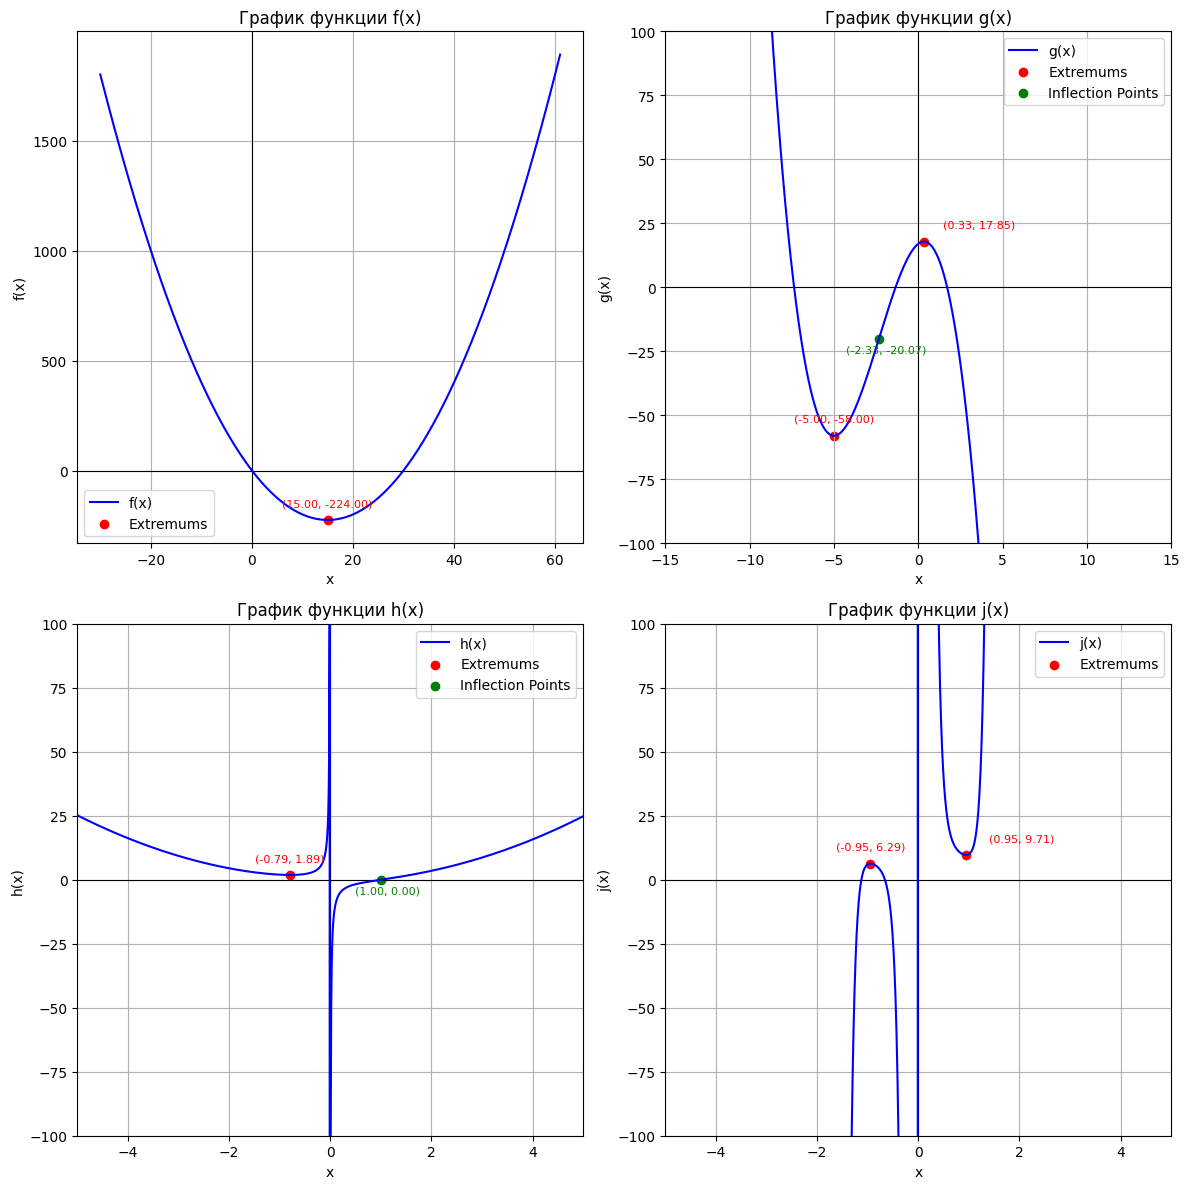

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(ax, func, x_range, extremums, inflection_points, title):
    x_values = np.arange(*x_range, 0.01)
    y_values = [func(x) for x in x_values]
    ax.axvline(x=0, c='black', linewidth=0.8)
    ax.axhline(y=0, c='black', linewidth=0.8)
    ax.plot(x_values, y_values, label=f'{func.__name__}(x)', color='blue')

    #экстремумы - красные
    if extremums:
        j=0
        y_extremums = [func(x) for x in extremums]
        ax.scatter(extremums, y_extremums, c='red', label='Extremums')
        for x_val, y_val in zip(extremums, y_extremums):
            ax.annotate(f'({x_val:.2f}, {y_val:.2f})',
                        (x_val, y_val),
                        textcoords="offset points",
                        xytext=(j, 10),
                        ha='center', fontsize=8, color='red')
            j+=40

    #точки перегиба - зеленые
    if inflection_points:
        y_inflections = [func(x) for x in inflection_points]
        ax.scatter(inflection_points, y_inflections, c='green', label='Inflection Points')
        for x_val, y_val in zip(inflection_points, y_inflections):
            ax.annotate(f'({x_val:.2f}, {y_val:.2f})',
                        (x_val, y_val),
                        textcoords="offset points",
                        xytext=(5, -10),
                        ha='center', fontsize=8, color='green')
    #Для функций g,h,j меняем пределы интервалов для x и y
    if func.__name__ == 'g':
        ax.set_xlim([-15, 15])
        ax.set_ylim([-100, 100])
    if func.__name__ == 'h' or func.__name__ == 'j':
        ax.set_xlim([-5, 5])
        ax.set_ylim([-100, 100])
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel(f'{func.__name__}(x)')
    ax.grid(True)
    ax.legend()

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

plot_function(axs[0, 0], f, (-30, 61), df_x, d2f_x2, 'График функции f(x)')
plot_function(axs[0, 1], g, (-15, 15), dg_x, d2g_x2, 'График функции g(x)')
plot_function(axs[1, 0], h, (-20, 20), dh_x, d2h_x2, 'График функции h(x)')
plot_function(axs[1, 1], j, (-20, 20), dj_x, d2j_x2, 'График функции j(x)')
plt.tight_layout()
plt.show()

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [6]:
def gradient_descent(x_start, func, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    df_x = sp.diff(func(x))
    trace = []
    trace.append(x_curr)
    for i in range(num_iterations):
      if abs(df_x.subs(x, x_curr))<delta:
        return x_curr, trace
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)
      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace
      x_curr = x_new
    return x_curr, trace

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [7]:
def param(func, x_range, num_iterations, lr=0.01):
    best_min = None
    best_x0 = None
    best_lr = None
    for x_start in x_range:
        try:
            x_min, _ = gradient_descent(x_start, func, lr, 0.001, 0.01, num_iterations)
            func_min = func(x_min)
            if best_min is None or func_min < best_min:
                best_min = func_min
                best_x0 = x_start
        except Exception:
            continue
    return best_x0
#подбираем начальное приближение. И вручную подбираем шаг градиентного спуска
f_xstart = param(f, range(-10, 11), 1000, 0.1)
print(f"f(x): x0 = {f_xstart}")
g_xstart = param(g, range(-20, -6), 1000, 0.01)
print(f"g(x): x0 = {g_xstart}")
h_xstart = param(h, range(-10, 0), 1000, 0.1)
print(f"h(x): x0 = {h_xstart}")
j_xstart = param(j, range(0, 2), 1000, 0.01)
print(f"j(x): x0 = {j_xstart}")

f(x): x0 = 5
g(x): x0 = -16
h(x): x0 = -7
j(x): x0 = 1


In [8]:
#находим минимумы функций с использованием лучшего начального приближения
f_x, f_x_trace = gradient_descent(f_xstart, f, 0.1, 0.001, 0.01, 1000)
print(f"Минимум функции f(x) в точке: ({f_x}, {f(f_x)})")
g_x, g_x_trace = gradient_descent(g_xstart, g, 0.01, 0.001, 0.01, 1000)
print(f"Минимум функции g(x) в точке: ({g_x}, {g(g_x)})")
h_x, h_x_trace = gradient_descent(h_xstart, h, 0.1, 0.001, 0.01, 1000)
print(f"Минимум функции h(x) в точке: ({h_x}, {h(h_x)})")
j_x, j_x_trace = gradient_descent(j_xstart, j, 0.01, 0.001, 0.01, 1000)
print(f"Минимум функции j(x) в точке: ({j_x}, {j(j_x)})")

Минимум функции f(x) в точке: (14.9959435180793, -223.999983544954)
Минимум функции g(x) в точке: (-5.00529827181333, -57.9997752777949)
Минимум функции h(x) в точке: (-0.794652709252208, 1.88988429262847)
Минимум функции j(x) в точке: (0.946395215890669, 9.70910852488629)


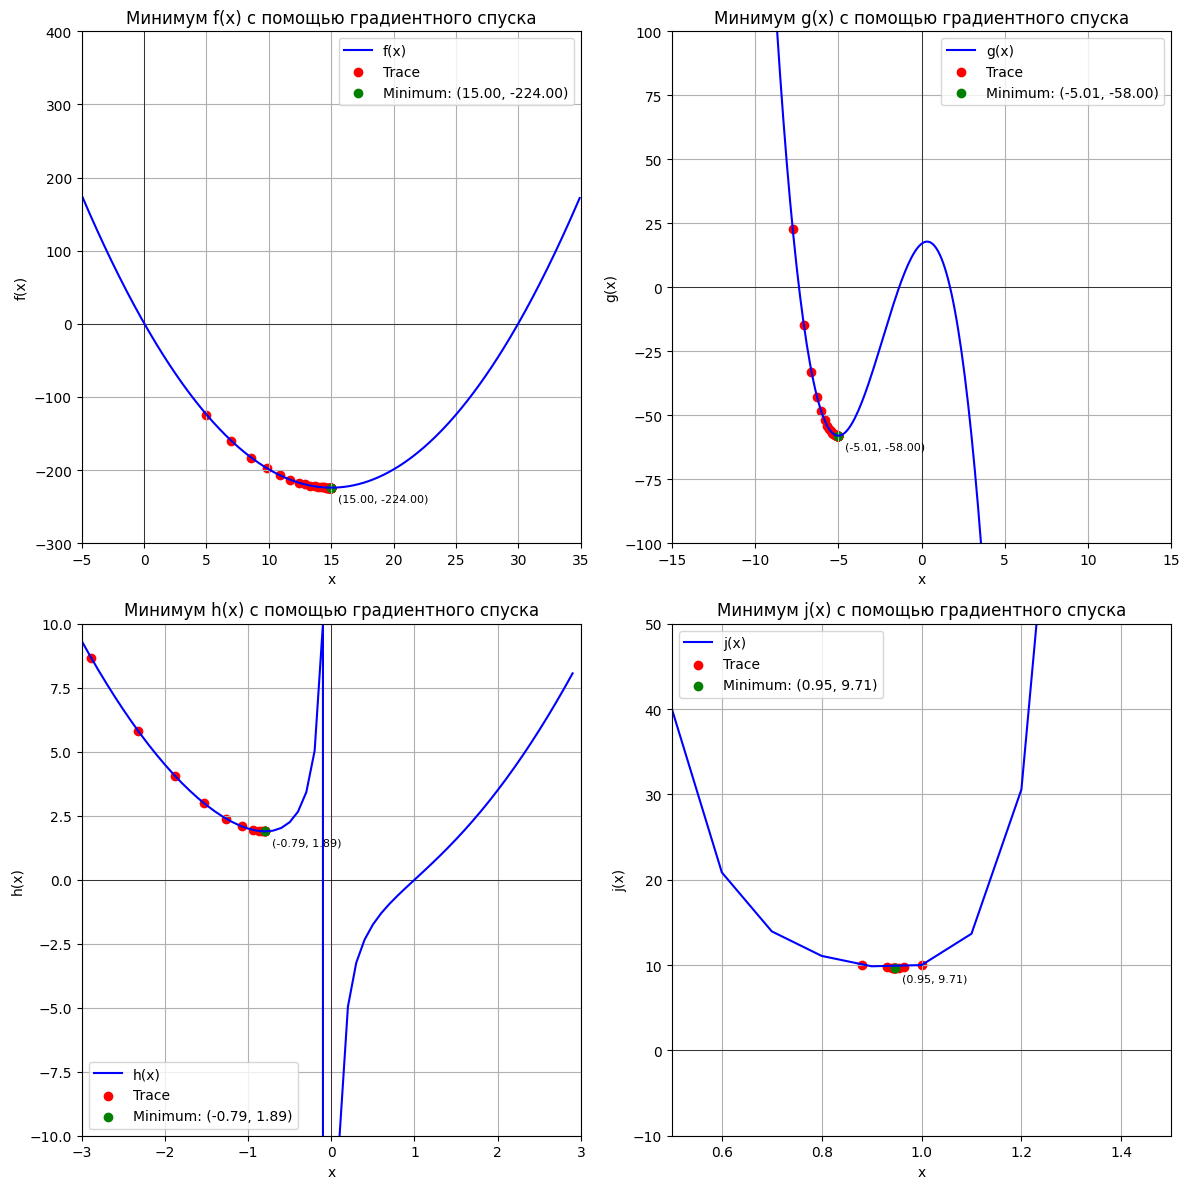

In [9]:
def plot_function_with_trace(ax, func, x_min, trace, x_range, y_range, title):
    x_values = np.arange(x_range[0], x_range[1], 0.1)
    f_values = [func(val) for val in x_values]

    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)

    ax.plot(x_values, f_values, label=f'{func.__name__}(x)', color='blue')

    trace_values = [func(val) for val in trace]
    ax.scatter(trace, trace_values, c='red', label='Trace')

    ax.scatter([x_min], [func(x_min)], c='green', label=f'Minimum: ({x_min:.2f}, {func(x_min):.2f})')
    ax.annotate(f'({x_min:.2f}, {func(x_min):.2f})',
                xy=(x_min, func(x_min)),
                textcoords="offset points",
                xytext=(5, -10),
                fontsize=8)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel(f'{func.__name__}(x)')
    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
plot_function_with_trace(axs[0, 0], f, f_x, f_x_trace, (-5, 35), (-300, 400), 'Минимум f(x) с помощью градиентного спуска')
plot_function_with_trace(axs[0, 1], g, g_x, g_x_trace, (-15, 15), (-100, 100), 'Минимум g(x) с помощью градиентного спуска')
plot_function_with_trace(axs[1, 0], h, h_x, h_x_trace, (-3, 3), (-10, 10), 'Минимум h(x) с помощью градиентного спуска')
plot_function_with_trace(axs[1, 1], j, j_x, j_x_trace, (0.5, 1.5), (-10, 50), 'Минимум j(x) с помощью градиентного спуска')
plt.tight_layout()
plt.show()

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [10]:
def newton_method(x_start, x_end, func, epsilon, delta, num_iterations):
    df_x = sp.diff(func(x))
    df_x_2 = sp.diff(func(x), x, 2)
    df_x_3 = sp.diff(func(x), x, 3)
    if df_x.subs(x, x_start)*df_x_3.subs(x, x_start)<0:
        x_curr = x_end
    else:
        x_curr = x_start
    trace = []
    trace.append(x_curr)
    print(f'Начальное приближение для функции {func.__name__}: {x_curr}')
    for i in range(num_iterations):
      if abs(df_x.subs(x, x_curr))<delta:
        # print(f"Минимум {func.__name__}(x): {x_curr}")
        return x_curr, trace
      x_new = float(x_curr - df_x.subs(x, x_curr)/df_x_2.subs(x, x_curr))
      trace.append(x_new)
      if abs(x_new - x_curr) < epsilon:
        # print(f"Минимум {func.__name__}(x): {x_curr}")
        return x_curr, trace
      x_curr = x_new
    # print(f"Минимум {func.__name__}(x): {x_curr}")
    return x_curr, trace

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [11]:
f_x_newton, f_x_trace_newton = newton_method(-10, 11, f, 0.001, 0.1, 1000)
print(f"Минимум функции f(x) в точке: ({f_x_newton}, {f(f_x_newton)})")
g_x_newton, g_x_trace_newton = newton_method(-10, 0, g, 0.001, 0.1, 1000)
print(f"Минимум функции g(x) в точке: ({g_x_newton}, {g(g_x_newton)})")
h_x_newton, h_x_trace_newton = newton_method(-20, -0.1, h, 0.001, 0.1, 1000)
print(f"Минимум функции h(x) в точке: ({h_x_newton}, {h(h_x_newton)})")
j_x_newton, j_x_trace_newton = newton_method(0.1, 10, j, 0.001, 0.1, 1000)
print(f"Минимум функции j(x) в точке: ({j_x_newton}, {j(j_x_newton)})")

Начальное приближение для функции f: -10
Минимум функции f(x) в точке: (15.0, -224.0)
Начальное приближение для функции g: -10
Минимум функции g(x) в точке: (-5.000048158804017, -57.99999998144574)
Начальное приближение для функции h: -0.1
Минимум функции h(x) в точке: (-0.7926033811577511, 1.8898851893550872)
Начальное приближение для функции j: 0.1
Минимум функции j(x) в точке: (0.9463073382195519, 9.709101967121093)


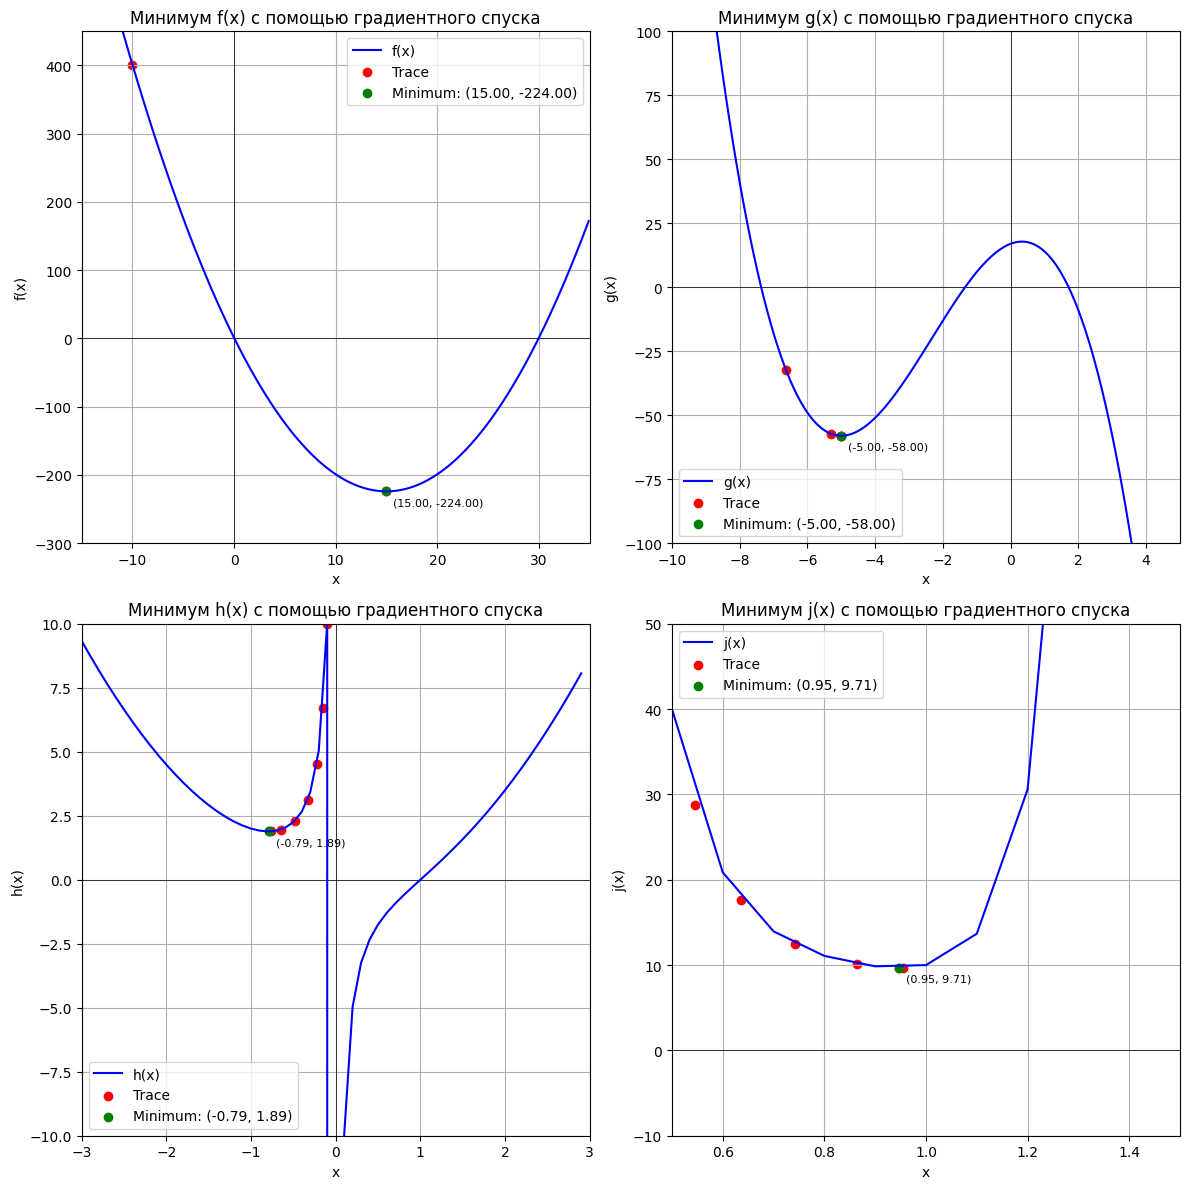

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
plot_function_with_trace(axs[0, 0], f, f_x_newton, f_x_trace_newton, (-15, 35), (-300, 450), 'Минимум f(x) с помощью градиентного спуска')
plot_function_with_trace(axs[0, 1], g, g_x_newton, g_x_trace_newton, (-10, 5), (-100, 100), 'Минимум g(x) с помощью градиентного спуска')
plot_function_with_trace(axs[1, 0], h, h_x_newton, h_x_trace_newton, (-3, 3), (-10, 10), 'Минимум h(x) с помощью градиентного спуска')
plot_function_with_trace(axs[1, 1], j, j_x_newton, j_x_trace_newton, (0.5, 1.5), (-10, 50), 'Минимум j(x) с помощью градиентного спуска')
plt.tight_layout()
plt.show()

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

1) Быстрее находит минимум метод Ньютона.

2) В функциях f,g,h более точный метод Ньютона. А в функции j метод градиентого спуска.

In [27]:
def gradient_descent(x_start, func, learning_rate, epsilon, delta, num_iterations, fixed_iterations=None):
    x_curr = x_start
    df_x = sp.diff(func(x))
    trace = []
    trace.append(x_curr)
    for i in range(num_iterations):
      if fixed_iterations and i + 1 == fixed_iterations:
        break
      if abs(df_x.subs(x, x_curr))<delta:
        return x_curr, trace
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)
      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace
      x_curr = x_new
    return x_curr, trace

def newton_method(x_start, x_end, func, epsilon, delta, num_iterations):
    df_x = sp.diff(func(x))
    df_x_2 = sp.diff(func(x), x, 2)
    df_x_3 = sp.diff(func(x), x, 3)
    if df_x.subs(x, x_start)*df_x_3.subs(x, x_start)<0:
        x_curr = x_end
    else:
        x_curr = x_start
    trace = []
    trace.append(x_curr)
    for i in range(num_iterations):
      if abs(df_x.subs(x, x_curr))<delta:
        return x_curr, trace
      x_new = float(x_curr - df_x.subs(x, x_curr)/df_x_2.subs(x, x_curr))
      trace.append(x_new)
      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace
      x_curr = x_new
    return x_curr, trace

In [38]:
import time

x_starts_newton = [-10, -10, -20, 0.1]
x_ends_newton = [11, 0, -0.1, 10]
x_start_gd = [f_xstart, g_xstart, h_xstart, j_xstart]
function = [f, g, h, j]

learning_rate = [0.1, 0.01, 0.1, 0.01]
epsilon = 1e-6
delta = 1e-6
num_iterations = 1000
fixed_iterations = 10

for i, func in enumerate(function):
    print(f"Функция: {func.__name__}(x)")
    newton_start = time.time()
    x_newton, x_trace_newton = newton_method(x_starts_newton[i], x_ends_newton[i], func, epsilon, delta, num_iterations)
    newton_end = time.time() - newton_start
    gradient_start = time.time()
    x_gd, x_trace_gd = gradient_descent(x_start_gd[i], func, learning_rate[i], epsilon, delta, num_iterations)
    gradient_end = time.time() - gradient_start
    print(f"Время выполнения метода Ньютона: {newton_end}")
    print(f"Время выполнения метода градиентного спуска: {gradient_end}")
    print(f"Количество итераций метода градиентого спуска: {len(x_trace_gd)}")
    print(f"Количество итераций метода Ньютона: {len(x_trace_newton)} \n")

    x_newton_fix, x_trace_newton_fix = newton_method(x_starts_newton[i], x_ends_newton[i], func, epsilon, delta, fixed_iterations)
    x_gd_fix, x_trace_gd_fix = gradient_descent(x_start_gd[i], func, learning_rate[i], epsilon, delta, num_iterations, fixed_iterations)
    print(f"Разность истинного значения минимума и минимума на 10 итерации при вычислении методом Ньютона: {abs(x_newton_fix - x_newton)}")
    print(f"Разность истинного значения минимума и минимума на 10 итерации при вычислении методом градиентного спуска: {abs(x_gd_fix - x_gd)} \n")

Функция: f(x)
Время выполнения метода Ньютона: 0.0030345916748046875
Время выполнения метода градиентного спуска: 0.05119729042053223
Количество итераций метода градиентого спуска: 68
Количество итераций метода Ньютона: 2 

Разность истинного значения минимума и минимума на 10 итерации при вычислении методом Ньютона: 0.0
Разность истинного значения минимума и минимума на 10 итерации при вычислении методом градиентного спуска: 1.34217326265489 

Функция: g(x)
Время выполнения метода Ньютона: 0.012140512466430664
Время выполнения метода градиентного спуска: 0.0818486213684082
Количество итераций метода градиентого спуска: 77
Количество итераций метода Ньютона: 6 

Разность истинного значения минимума и минимума на 10 итерации при вычислении методом Ньютона: 0.0
Разность истинного значения минимума и минимума на 10 итерации при вычислении методом градиентного спуска: 0.675810485199731 

Функция: h(x)
Время выполнения метода Ньютона: 0.017357826232910156
Время выполнения метода градиентног

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [31]:
def gradient_descent_momentum(x_start, func, learning_rate, epsilon, delta, num_iterations, beta):
    x_curr = x_start
    v_curr = x_curr
    df_x = sp.diff(func(x))
    trace = []
    trace.append(x_curr)
    for i in range(num_iterations):
      if abs(df_x.subs(x, x_curr))<delta:
        return x_curr, trace
      v_new = beta * v_curr - learning_rate * df_x.subs(x, x_curr)
      x_new = x_curr + v_new
      trace.append(x_new)
      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace
      x_curr = x_new
      v_curr = v_new
    return x_curr, trace

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

Количество итераций и время уменьшилось, соответственно можно сделать вывод, что оптимизация прошла успешно

In [41]:
for i, func in enumerate(function):
    print(f"Функция: {func.__name__}(x)")
    gradient_start = time.time()
    x_gd, x_trace_gd = gradient_descent_momentum(x_start_gd[i], func, learning_rate[i], epsilon, delta, num_iterations, 0.1)
    gradient_end = time.time() - gradient_start
    print(f"Значение минимума: {x_gd}")
    print(f"Количество итеарций: {len(x_trace_gd)}")
    print(f"Время выполнения: {gradient_end} \n")

Функция: f(x)
Значение минимума: 14.9999956895438
Количество итеарций: 58
Время выполнения: 0.028368473052978516 

Функция: g(x)
Значение минимума: -5.00000473106707
Количество итеарций: 68
Время выполнения: 0.03165078163146973 

Функция: h(x)
Значение минимума: -0.793702361337543
Количество итеарций: 20
Время выполнения: 0.008124828338623047 

Функция: j(x)
Значение минимума: 0.945893340474684
Количество итеарций: 13
Время выполнения: 0.006981611251831055 



## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

Я думаю, что этот кот Яны)))